In [1]:
from keras.datasets import mnist

from keras.utils import to_categorical
from keras import models, layers

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
(x_tr, y_tr),(x_te,y_te) = mnist.load_data()

In [0]:
#Preprocess

In [0]:
x_tr = x_tr.astype('float32')/255.
x_te = x_te.astype('float32')/255.
x_tr = x_tr.reshape((x_tr.shape[0],x_tr.shape[1]*x_tr.shape[2]))
x_te = x_te.reshape((x_te.shape[0],x_te.shape[1]*x_te.shape[2]))


In [0]:
y_tr = to_categorical(y_tr)
y_te = to_categorical(y_te)

In [0]:
x_val = x_tr[:10000]
y_val = y_tr[:10000]

x_tr = x_tr[10000:]
y_tr = y_tr[10000:]



In [7]:
x_val.shape

(10000, 784)

In [8]:
y_val.shape

(10000, 10)

In [0]:
# Model

In [0]:
#A function to create the model
def build_complex_model():
    model = models.Sequential()
    
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
complex_model = build_complex_model() #Create the model

In [12]:
complex_model.summary() #Lets see how many parameters do we have.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10250     
Total params: 3,036,682
Trainable params: 3,036,682
Non-trainable params: 0
_________________________________________________________________


In [13]:
complex_hist = complex_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_val, y_val)) #train the model

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 107us/step - loss: 0.2984 - acc: 0.9107 - val_loss: 0.1736 - val_acc: 0.9503
Epoch 2/10
50000/50000 [==============================] - 4s 89us/step - loss: 0.1205 - acc: 0.9673 - val_loss: 0.1201 - val_acc: 0.9698
Epoch 3/10
50000/50000 [==============================] - 4s 88us/step - loss: 0.0899 - acc: 0.9768 - val_loss: 0.1487 - val_acc: 0.9671
Epoch 4/10
50000/50000 [==============================] - 4s 88us/step - loss: 0.0801 - acc: 0.9797 - val_loss: 0.1939 - val_acc: 0.9593
Epoch 5/10
50000/50000 [==============================] - 4s 88us/step - loss: 0.0743 - acc: 0.9823 - val_loss: 0.1469 - val_acc: 0.9709
Epoch 6/10
50000/50000 [==============================] - 4s 88us/step - loss: 0.0625 - acc: 0.9856 - val_loss: 0.1664 - val_acc: 0.9720
Epoch 7/10
50000/50000 [==============================] - 4s 88us/step - loss: 0.0625 - acc: 0.9864 - val_loss: 0.1746 - val_ac

In [0]:
complex_hist = complex_hist.history

In [15]:
complex_hist.keys

<function dict.keys>

In [0]:
def print_acc(hist):
  epochs = range(1, len(hist['acc'])+1)
  plt.plot(epochs, hist['acc'], 'b', label='Training acc')
  plt.plot(epochs, hist['val_acc'], 'r', label='Validation acc')
  plt.title('Training and validation Acc')
  plt.xlabel('Epochs')
  plt.ylabel('Acc')
  plt.legend()
  plt.show()

In [0]:
def print_loss(hist):
  epochs = range(1, len(hist['loss'])+1)
  plt.plot(epochs, hist['loss'], 'b', label='Training loss')
  plt.plot(epochs, hist['val_loss'], 'r', label='Validation loss')
  plt.title('Training and validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

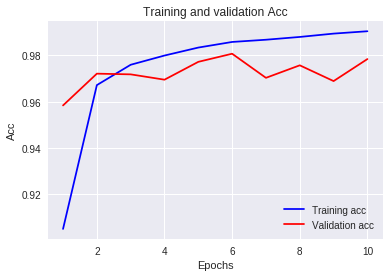

In [30]:
print_acc(complex_hist)

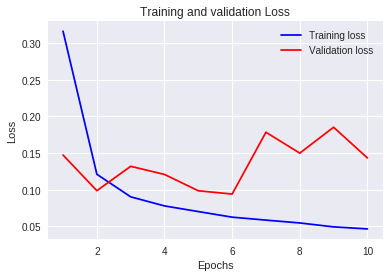

In [31]:
print_loss(complex_hist)

## **TO DO - Split validation an training.**
## **TO DO - Let's reduce the number of layers and analyze the behaviour.**


In [0]:
perfect_model = build_complex_model() #Create the model

In [46]:
perfect_hist = perfect_model.fit(x_tr, y_tr, epochs=6, batch_size=128, validation_data=(x_val, y_val)) #train the model

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 4s 89us/step - loss: 0.3118 - acc: 0.9068 - val_loss: 0.1931 - val_acc: 0.9530
Epoch 2/6
50000/50000 [==============================] - 4s 81us/step - loss: 0.1234 - acc: 0.9666 - val_loss: 0.1201 - val_acc: 0.9684
Epoch 3/6
50000/50000 [==============================] - 4s 81us/step - loss: 0.0941 - acc: 0.9750 - val_loss: 0.1141 - val_acc: 0.9709
Epoch 4/6
50000/50000 [==============================] - 4s 80us/step - loss: 0.0794 - acc: 0.9804 - val_loss: 0.1126 - val_acc: 0.9726
Epoch 5/6
50000/50000 [==============================] - 4s 80us/step - loss: 0.0684 - acc: 0.9834 - val_loss: 0.1299 - val_acc: 0.9713
Epoch 6/6
50000/50000 [==============================] - 4s 80us/step - loss: 0.0665 - acc: 0.9844 - val_loss: 0.1270 - val_acc: 0.9753


In [47]:
perfect_model.evaluate(x_te, y_te)

10000/10000 [==============================] - 1s 84us/step


[0.14156870541809194, 0.975]

In [0]:
#A function to create the model
def build_simple_model():
    model = models.Sequential()
    
    model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
simple_model = build_complex_model()

In [50]:
simple_hist = simple_model.fit(x_tr, y_tr, epochs=6, batch_size=128, validation_data=(x_val, y_val)) #train the model

Train on 50000 samples, validate on 10000 samples
Epoch 1/6
50000/50000 [==============================] - 5s 95us/step - loss: 0.3001 - acc: 0.9118 - val_loss: 0.1186 - val_acc: 0.9665
Epoch 2/6
50000/50000 [==============================] - 4s 85us/step - loss: 0.1195 - acc: 0.9675 - val_loss: 0.1330 - val_acc: 0.9617
Epoch 3/6
50000/50000 [==============================] - 4s 83us/step - loss: 0.0919 - acc: 0.9758 - val_loss: 0.1042 - val_acc: 0.9754
Epoch 4/6
50000/50000 [==============================] - 4s 82us/step - loss: 0.0756 - acc: 0.9815 - val_loss: 0.1127 - val_acc: 0.9746
Epoch 5/6
50000/50000 [==============================] - 4s 83us/step - loss: 0.0732 - acc: 0.9823 - val_loss: 0.1559 - val_acc: 0.9669
Epoch 6/6
50000/50000 [==============================] - 4s 82us/step - loss: 0.0654 - acc: 0.9850 - val_loss: 0.1027 - val_acc: 0.9777


In [0]:
simple_hist = simple_hist.history

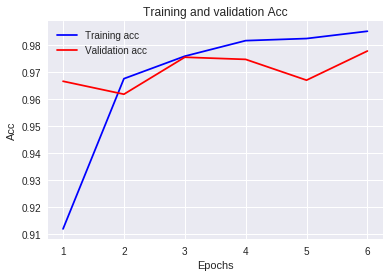

In [55]:
print_acc(simple_hist)

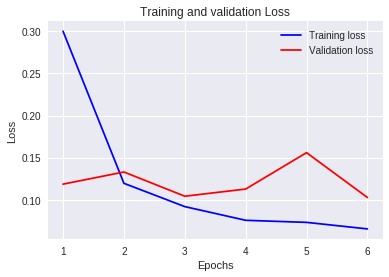

In [56]:
print_loss(simple_hist)